In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [4]:
file_loc = "face/new"  
names = ["jack","musk","gates","Tural"]

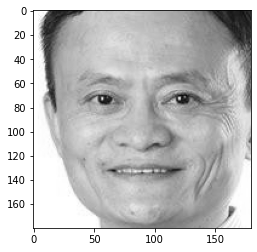

(180, 180)


In [6]:
for name in names:
    path = os.path.join(file_loc,name)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        print(img_array.shape)
        break
    break

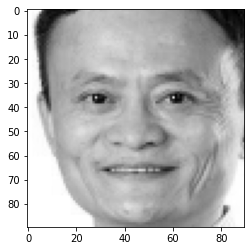

(90, 90)

In [7]:
IMG_SIZE = 90

new_arry = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_arry,cmap='gray')
plt.show()
new_arry.shape

In [8]:
all_data = []  

def make_dataset():
    for name in names:
        path = os.path.join(file_loc,name)
        class_num = names.index(name)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_arry = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                all_data.append([new_arry,class_num])
            except Exception as e:
                pass
            
make_dataset()

In [9]:
print(len(all_data))

259


In [10]:
X = []
y = []

In [12]:
for img_array , labels in all_data:
    X.append(img_array)
    y.append(labels)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [14]:
y = pd.DataFrame(y)

In [15]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [16]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(90, 90, 1)),
  layers.Conv2D(16, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
epochs=10
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/10
7/7 [==============================] - 3s 289ms/step - loss: 1.3600 - accuracy: 0.3317 - val_loss: 1.2505 - val_accuracy: 0.3654
Epoch 2/10
7/7 [==============================] - 2s 243ms/step - loss: 1.2686 - accuracy: 0.3701 - val_loss: 1.1829 - val_accuracy: 0.3846
Epoch 3/10
7/7 [==============================] - 2s 243ms/step - loss: 1.2518 - accuracy: 0.3965 - val_loss: 1.1064 - val_accuracy: 0.4423
Epoch 4/10
7/7 [==============================] - 2s 250ms/step - loss: 1.0459 - accuracy: 0.6207 - val_loss: 0.9674 - val_accuracy: 0.7115
Epoch 5/10
7/7 [==============================] - 2s 254ms/step - loss: 0.9160 - accuracy: 0.7147 - val_loss: 0.7448 - val_accuracy: 0.7692
Epoch 6/10
7/7 [==============================] - 2s 249ms/step - loss: 0.6335 - accuracy: 0.7533 - val_loss: 0.6906 - val_accuracy: 0.7692
Epoch 7/10
7/7 [==============================] - 2s 244ms/step - loss: 0.4364 - accuracy: 0.8318 - val_loss: 0.3867 - val_accuracy: 0.8846
Epoch 8/10
7/7 [====

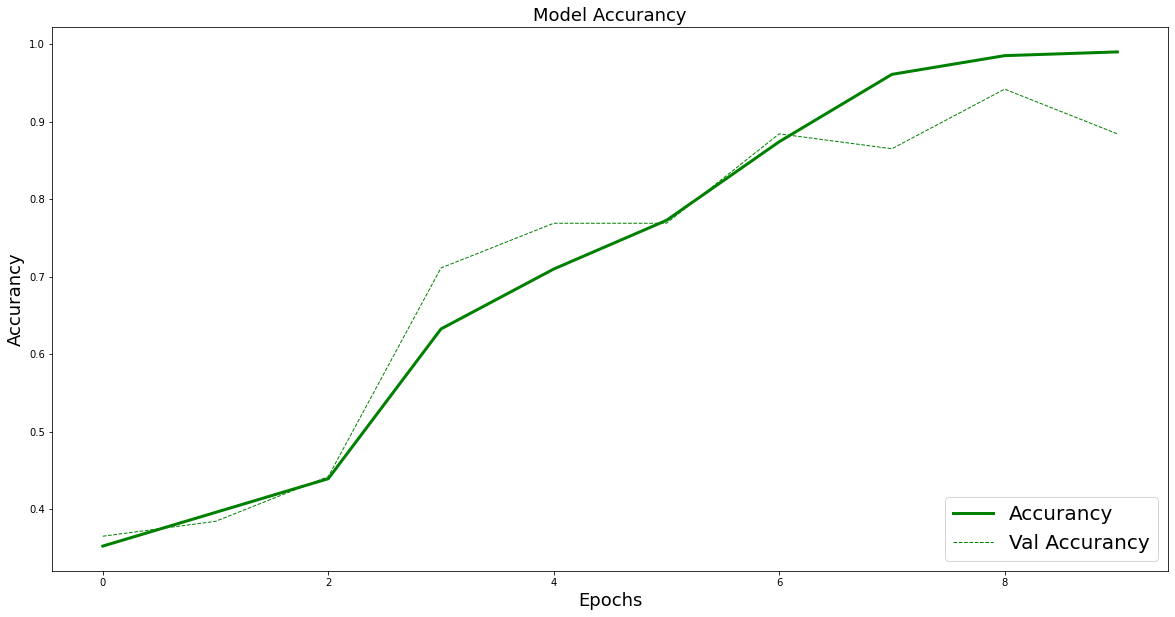

In [20]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'],color='green',linewidth=3,label="Accurancy")
plt.plot(history.history['val_accuracy'],color='green',linewidth=1,linestyle="--",label="Val Accurancy")
plt.title("Model Accurancy",fontsize=18)
plt.xlabel("Epochs",fontsize=18)
plt.ylabel("Accurancy",fontsize=18)
plt.rcParams.update({'font.size': 20})
plt.legend(loc=4, prop={'size': 20})

you can change epochs to get more great accurancy score but its more than enough for my model

In [21]:
y_pred = model.predict(X_test)

In [23]:
predicted = []

for i in y_pred:
    predicted.append(np.argmax(i))

In [24]:
print("Classification Report: \n", classification_report(y_test, predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.78      0.95      0.86        19
           2       1.00      1.00      1.00         5
           3       1.00      0.71      0.83         7

    accuracy                           0.88        52
   macro avg       0.93      0.88      0.90        52
weighted avg       0.90      0.88      0.88        52



In [25]:
model.save("my_model") #saveing our module for testing cv file

INFO:tensorflow:Assets written to: my_model/assets
